<a href="https://colab.research.google.com/github/suraj105/Apex-D-Software/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pot
pot.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
files.upload()

Saving abc.csv to abc.csv


{'abc.csv': b'Date,Price,Open,High,Low,Vol.,Change %,Close\n"Dec 09, 2021",47776,50477.6,50790.2,47525.4,53.58K,-5.35%,50596.6\n"Dec 08, 2021",50473.9,50596.6,51204.7,48700.7,55.59K,-0.24%,50547.4\n"Dec 07, 2021",50595.2,50547.4,51918.6,50070.9,56.29K,0.07%,49412.1\n"Dec 06, 2021",50562.1,49412.1,50913.3,47237.9,89.68K,2.34%,49196.4\n"Dec 05, 2021",49405.5,49196.4,49689.3,47797.8,72.03K,0.43%,53620.7\n"Dec 04, 2021",49195.2,53620.7,53847.2,42587.8,168.00K,-8.27%,56495.2\n"Dec 03, 2021",53631.5,56495.2,57543.6,52008.9,89.20K,-5.07%,57207.8\n"Dec 02, 2021",56496,57207.8,57377.5,55807.9,54.94K,-1.25%,56891.7\n"Dec 01, 2021",57210.3,56891.7,59064.3,56496.5,66.75K,0.58%,57795.2\n"Nov 30, 2021",56882.9,57795.2,59174.4,55936.9,73.66K,-1.58%,57288.1\n"Nov 29, 2021",57794.8,57288.1,58855.2,56726.7,58.65K,0.88%,54758\n"Nov 28, 2021",57291.5,54758,57392.3,53448.3,49.28K,4.61%,53747.2\n"Nov 27, 2021",54765.9,53747.2,55280.3,53654.3,40.71K,1.93%,58937.3\n"Nov 26, 2021",53730.9,58937.3,59151.1,53533

In [ ]:
df=pd.read_csv('abc.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Price,Open,High,Low,Vol.,Change %,Close
2021-12-09,"Dec 09, 2021",47776.0,50477.6,50790.2,47525.4,53.58K,-5.35%,50596.6
2021-12-08,"Dec 08, 2021",50473.9,50596.6,51204.7,48700.7,55.59K,-0.24%,50547.4
2021-12-07,"Dec 07, 2021",50595.2,50547.4,51918.6,50070.9,56.29K,0.07%,49412.1
2021-12-06,"Dec 06, 2021",50562.1,49412.1,50913.3,47237.9,89.68K,2.34%,49196.4
2021-12-05,"Dec 05, 2021",49405.5,49196.4,49689.3,47797.8,72.03K,0.43%,53620.7
...,...,...,...,...,...,...,...,...
2013-01-05,"Jan 05, 2013",13.4,13.5,13.6,13.3,21.33K,-0.44%,13.4
2013-01-04,"Jan 04, 2013",13.5,13.4,13.5,13.3,29.64K,0.75%,13.3
2013-01-03,"Jan 03, 2013",13.4,13.3,13.5,13.3,18.03K,0.90%,13.3
2013-01-02,"Jan 02, 2013",13.3,13.3,13.4,13.2,17.97K,0.00%,13.5


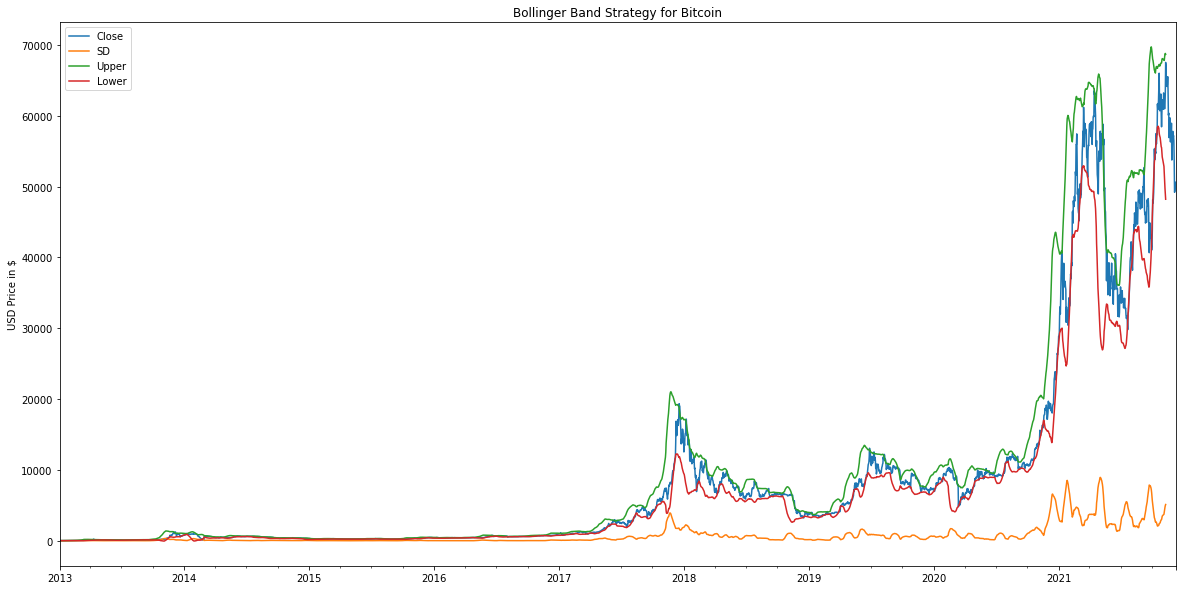

In [ ]:
#calculating SMA, SD, UB and LB

#time period

period = 30

#for SMA
df['SMA'] = df['Close'].rolling(window=period).mean()
#for SD
df['SD'] = df['Close'].rolling(window=period).std()
# Upper Bollinger Band
df['Upper'] = df['SMA'] + (df['SD'] * 2)
# lower Bollinger band
df['Lower'] = df['SMA'] - (df['SD'] * 2)

#create list of column
column_list =['Close', 'SD', 'Upper','Lower']
#plot the data
df[column_list].plot(figsize=(20,10))

import matplotlib.pyplot as pot

pot.title('Bollinger Band Strategy for Bitcoin')
pot.ylabel('USD Price in $')
pot.show()

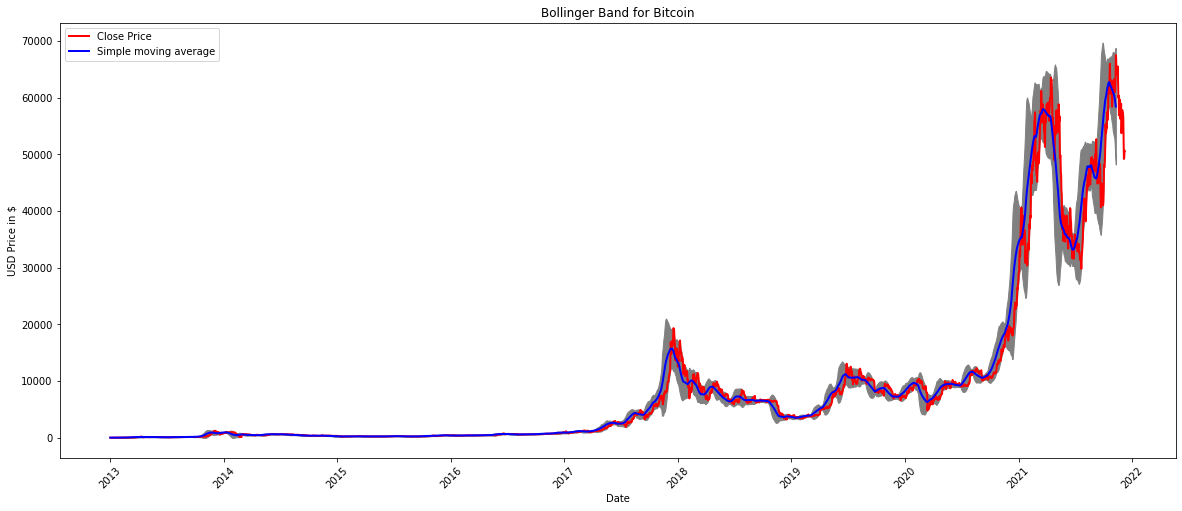

In [ ]:
#plot shade area between Bollinger bands

fig = pot.figure(figsize=(20,8))
#add plot
ax = fig.add_subplot(1,1,1)
#get iindev values of data frame
x_axis = df.index
#plot and shade the area between UP and LB
ax.fill_between(x_axis, df['Upper'],df['Lower'],color ='grey')
#plot closing price and average
ax.plot(x_axis, df['Close'], color ='red', lw =2, label='Close Price')
ax.plot(x_axis, df['SMA'], color ='blue', lw =2, label='Simple moving average')
ax.set_title('Bollinger Band for Bitcoin')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price in $')
pot.xticks(rotation = 45)
ax.legend()
pot.show()

In [ ]:
#create new data

new_df = df[period-1:]
new_df

,Date,Price,Open,High,Low,Vol.,Change %,Close,SMA,SD,Upper,Lower
2021-11-10,"Nov 10, 2021",64932.6,66942.6,68990.6,62951.3,96.21K,-2.95%,67528.7,58440.913333,5114.501856,68669.917045,48211.909621
2021-11-09,"Nov 09, 2021",66904.4,67528.7,68493.3,66334.9,66.13K,-0.92%,63276.4,58863.573333,4965.658560,68794.890454,48932.256213
2021-11-08,"Nov 08, 2021",67527.9,63276.4,67763.3,63276.4,81.08K,6.72%,61483.8,59228.120000,4729.931121,68687.982242,49768.257758
2021-11-07,"Nov 07, 2021",63273.2,61483.8,63273.2,61347.2,34.34K,2.91%,60973.2,59613.490000,4359.021396,68331.532792,50895.447208
2021-11-06,"Nov 06, 2021",61483.9,60973.2,61543.2,60093.6,34.89K,0.84%,61411.5,60020.660000,3898.604578,67817.869156,52223.450844
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,"Jan 05, 2013",13.4,13.5,13.6,13.3,21.33K,-0.44%,13.4,15.916667,2.284745,20.486156,11.347177
2013-01-04,"Jan 04, 2013",13.5,13.4,13.5,13.3,29.64K,0.75%,13.3,15.676667,2.161526,19.999719,11.353614
2013-01-03,"Jan 03, 2013",13.4,13.3,13.5,13.3,18.03K,0.90%,13.3,15.440000,2.009907,19.459813,11.420187
2013-01-02,"Jan 02, 2013",13.3,13.3,13.4,13.2,17.97K,0.00%,13.5,15.233333,1.870706,18.974745,11.491921


In [ ]:
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: # then you should sell
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: # then buy
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)

  return(buy_signal, sell_signal)

In [ ]:
import numpy as np

#Create two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


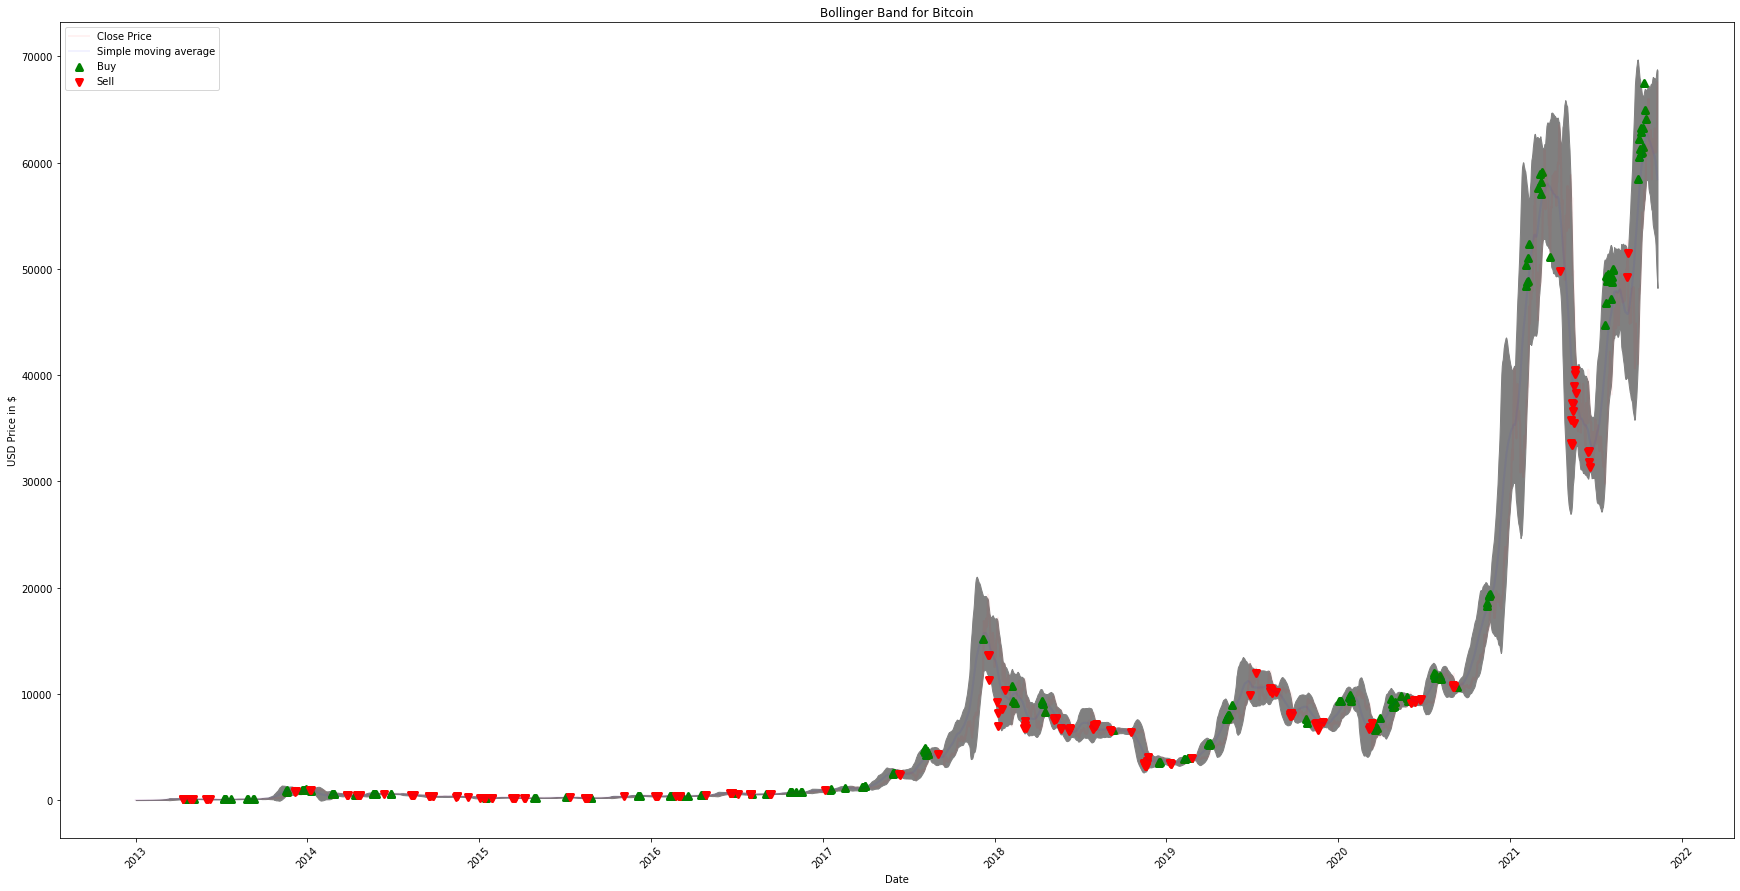

In [ ]:
#plot all the data

fig = pot.figure(figsize=(30,15))
#add plot
ax = fig.add_subplot(1,1,1)
#get iindev values of data frame
x_axis = new_df.index
#plot and shade the area between UP and LB
ax.fill_between(x_axis, new_df['Upper'],new_df['Lower'],color ='grey')
#plot closing price and average
ax.plot(x_axis, new_df['Close'], color ='red', lw =2, label='Close Price', alpha= 0.05)
ax.plot(x_axis, new_df['SMA'], color ='blue', lw =2, label='Simple moving average', alpha= 0.05)
ax.scatter(x_axis, new_df['Buy'], color ='green', lw=3 , label='Buy', marker='^', alpha= 1)
ax.scatter(x_axis, new_df['Sell'], color ='red', lw=3 , label='Sell', marker='v', alpha= 1)

ax.set_title('Bollinger Band for Bitcoin')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price in $')
pot.xticks(rotation = 45)
ax.legend()
pot.show()


In [ ]:
buy = []
sell = []
open_pos = False

for i in range(len(df)):
  if df.Lower[i] > df.Close[i]:
    if open_pos == False:
      buy.append(i)
      open_pos = True
  elif df.Upper[i] < df.Close[i]:
    if open_pos:
      sell.append(i)
      open_pos = False

In [ ]:
buy


[54,
 123,
 257,
 490,
 560,
 680,
 775,
 934,
 1024,
 1087,
 1186,
 1330,
 1395,
 1463,
 1579,
 1651,
 1848,
 1922,
 1990,
 2058,
 2124,
 2192,
 2296,
 2349,
 2519,
 2721,
 2754,
 2798,
 2842,
 2896,
 2942,
 3140,
 3157]

In [ ]:
sell

[92,
 173,
 461,
 532,
 636,
 739,
 806,
 1018,
 1063,
 1112,
 1190,
 1372,
 1417,
 1558,
 1640,
 1798,
 1914,
 1955,
 1996,
 2106,
 2154,
 2225,
 2303,
 2436,
 2521,
 2737,
 2787,
 2813,
 2892,
 2924,
 3107,
 3143,
 3163]

In [ ]:
total = pd.concat([df.iloc[buy].Close, df.iloc[sell].Close], axis = 1)

In [ ]:
total

,Close,Close
2013-04-12,NaN,165.0
2013-04-18,68.4,NaN
2013-05-02,NaN,139.2
2013-05-05,98.1,NaN
2013-06-07,NaN,121.9
...,...,...
2021-03-27,51317.4,NaN
2021-06-19,NaN,38045.5
2021-08-08,42784.7,NaN
2021-09-08,NaN,52674.2


In [ ]:
total.columns = ['Buys', 'Sells']

In [ ]:
total

,Buys,Sells
2013-04-12,NaN,165.0
2013-04-18,68.4,NaN
2013-05-02,NaN,139.2
2013-05-05,98.1,NaN
2013-06-07,NaN,121.9
...,...,...
2021-03-27,51317.4,NaN
2021-06-19,NaN,38045.5
2021-08-08,42784.7,NaN
2021-09-08,NaN,52674.2


In [ ]:
totalprofit = total.shift(-1).Sells - total.Buys

In [ ]:
totalprofit

2013-04-12        NaN
2013-04-18       70.8
2013-05-02        NaN
2013-05-05       23.8
2013-06-07        NaN
               ...   
2021-03-27   -13271.9
2021-06-19        NaN
2021-08-08     9889.5
2021-09-08        NaN
2021-10-16        NaN
Length: 66, dtype: float64

In [ ]:
relprofit = (total.shift(-1).Sells - total.Buys)/total.Buys

In [ ]:
relprofit

2013-04-12         NaN
2013-04-18    1.035088
2013-05-02         NaN
2013-05-05    0.242610
2013-06-07         NaN
                ...   
2021-03-27   -0.258624
2021-06-19         NaN
2021-08-08    0.231146
2021-09-08         NaN
2021-10-16         NaN
Length: 66, dtype: float64

In [ ]:
relprofit.mean()

0.3134015062735003